In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os
os.environ['OMP_NUM_THREADS'] = '1'

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


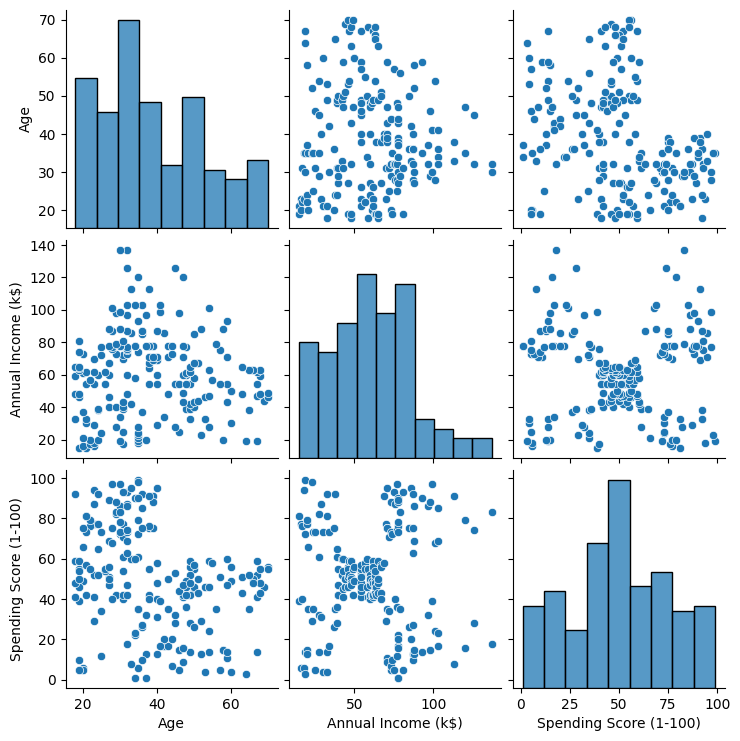

In [3]:
sns.pairplot(dataset.iloc[:, [2,3,4]])

## Part One: KMeans Clustering

In [4]:
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, [3,4]]
print('X before', X)
print('*****' * 10)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

X before      Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]
**************************************************


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

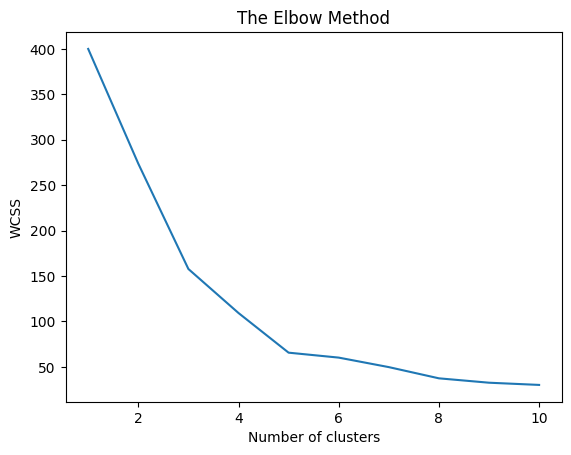

In [5]:
from sklearn.cluster import KMeans

wcss = []
start_index = 1
stop_index = 11

for i in range(start_index, stop_index):
    kmeans = KMeans(n_init='auto', n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(start_index, stop_index), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans(n_init='auto', n_clusters=5, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

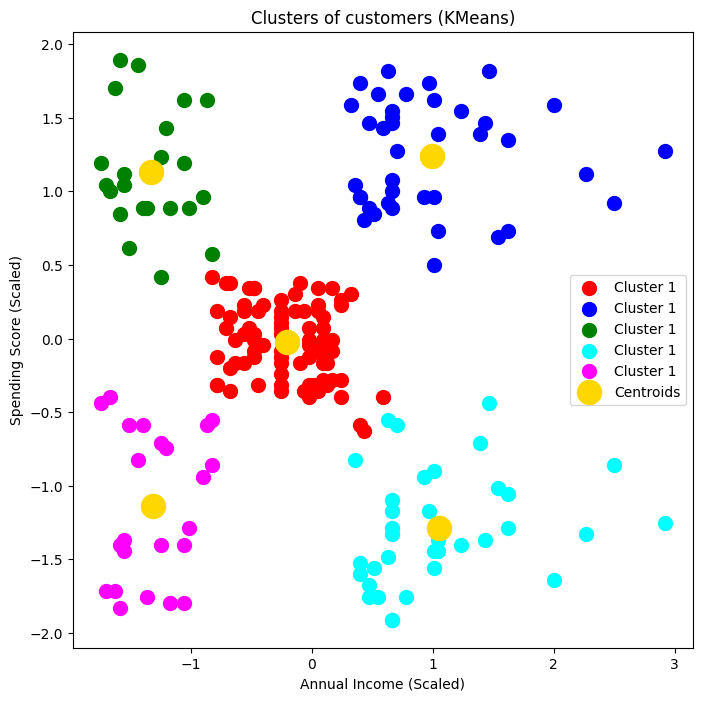

In [7]:
plt.figure(figsize=(8,8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for j in range(0, 5):
    plt.scatter(X[y_means==j, 0], X[y_means==j,1], s=100, c=colors[j], label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='gold', label='Centroids')
plt.title('Clusters of customers (KMeans)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

## Part Two: Hierarchical Clustering

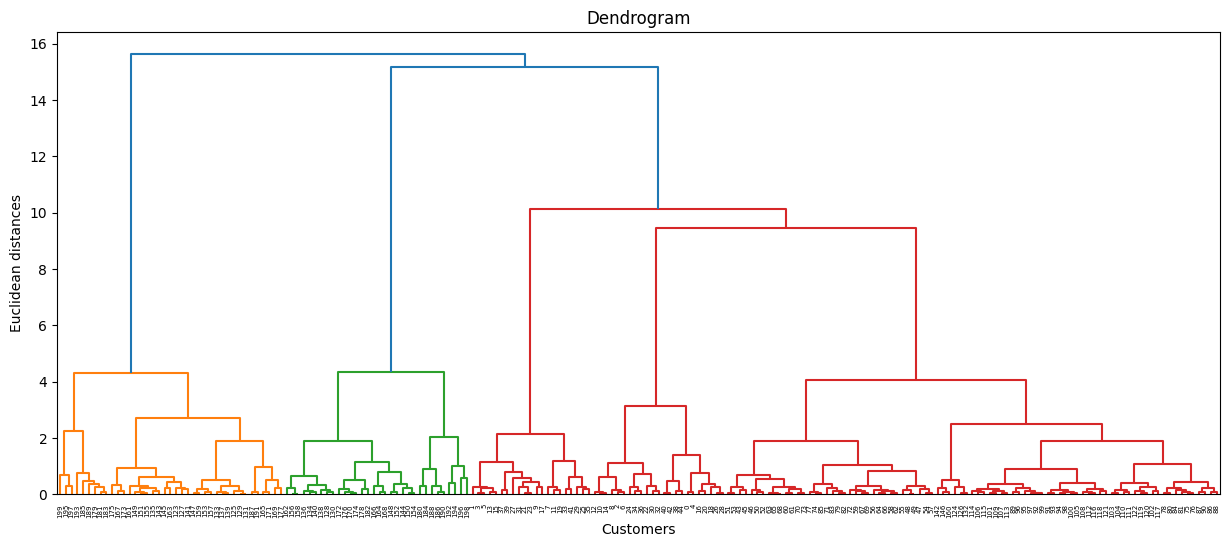

In [8]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

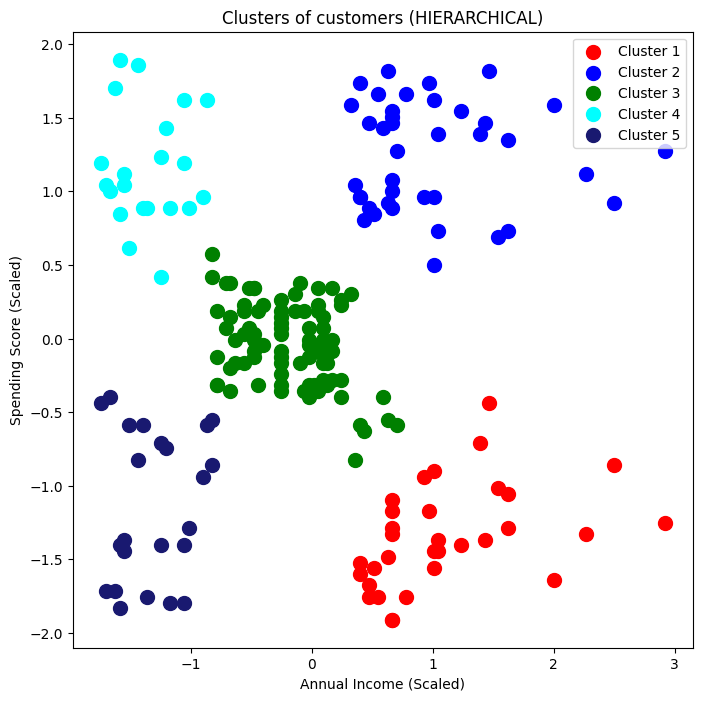

In [10]:
plt.figure(figsize=(8,8))
colors = ['red', 'blue', 'green', 'cyan', 'midnightblue']
for j in range(0, 5):
    plt.scatter(X[y_hc==j, 0], X[y_hc==j,1], s=100, c=colors[j], label=f'Cluster {j+1}')

plt.title('Clusters of customers (HIERARCHICAL)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

## Part Three: DBSCAN

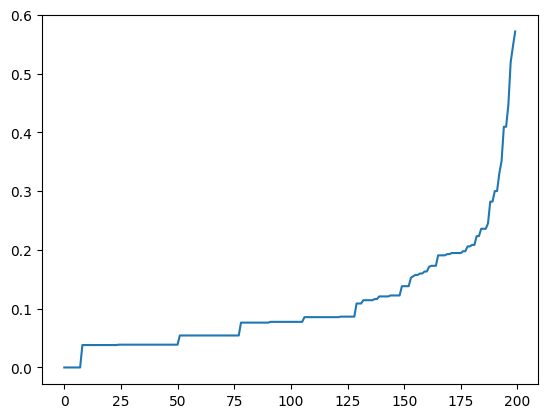

In [11]:
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=2)
distances, indices = neighbours.fit(X).kneighbors(X)

# print(distances)
# print(indices)

distances = distances[:, 1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3, -1, -1,  5,  3, -1, -1,
        5, -1,  5,  3,  5,  3,  5, -1,  5,  3, -1,  3,  5,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

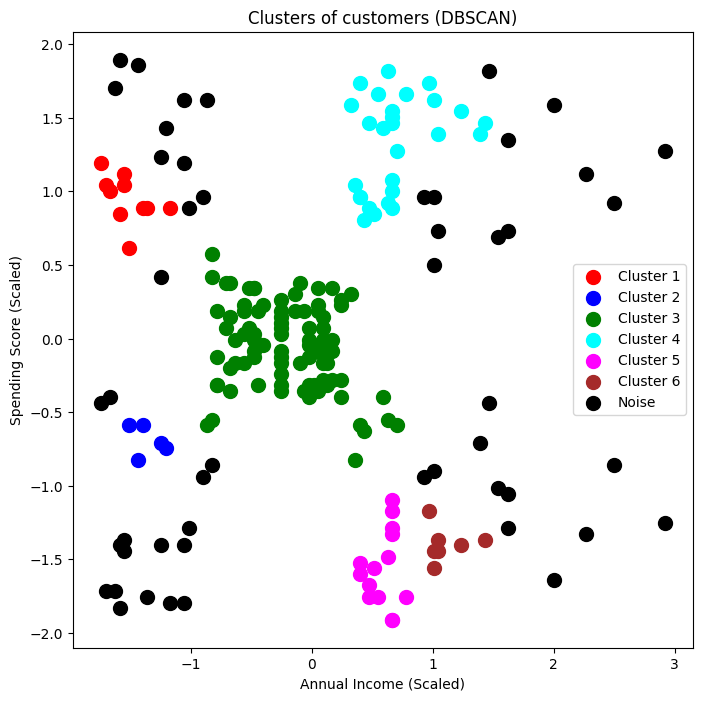

In [13]:
plt.figure(figsize=(8,8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'brown']
for j in range(0, 6):
    plt.scatter(X[y_dbscan==j, 0], X[y_dbscan==j,1], s=100, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(X[y_dbscan==-1,0], X[y_dbscan==-1,1], s=100, c='black', label='Noise')

plt.title('Clusters of customers (DBSCAN)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

## Part Four: Clustering Data with Higher Dimensionality

In [14]:
financials = pd.read_csv('costpercompany.csv')
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       29 non-null     object 
 1   surcharges    29 non-null     float64
 2   RoR           29 non-null     float64
 3   dailycost     29 non-null     int64  
 4   costwithload  29 non-null     float64
 5   costofDemand  29 non-null     float64
 6   Sales         29 non-null     int64  
 7   WearandTear   29 non-null     float64
 8   Fcost         29 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.2+ KB


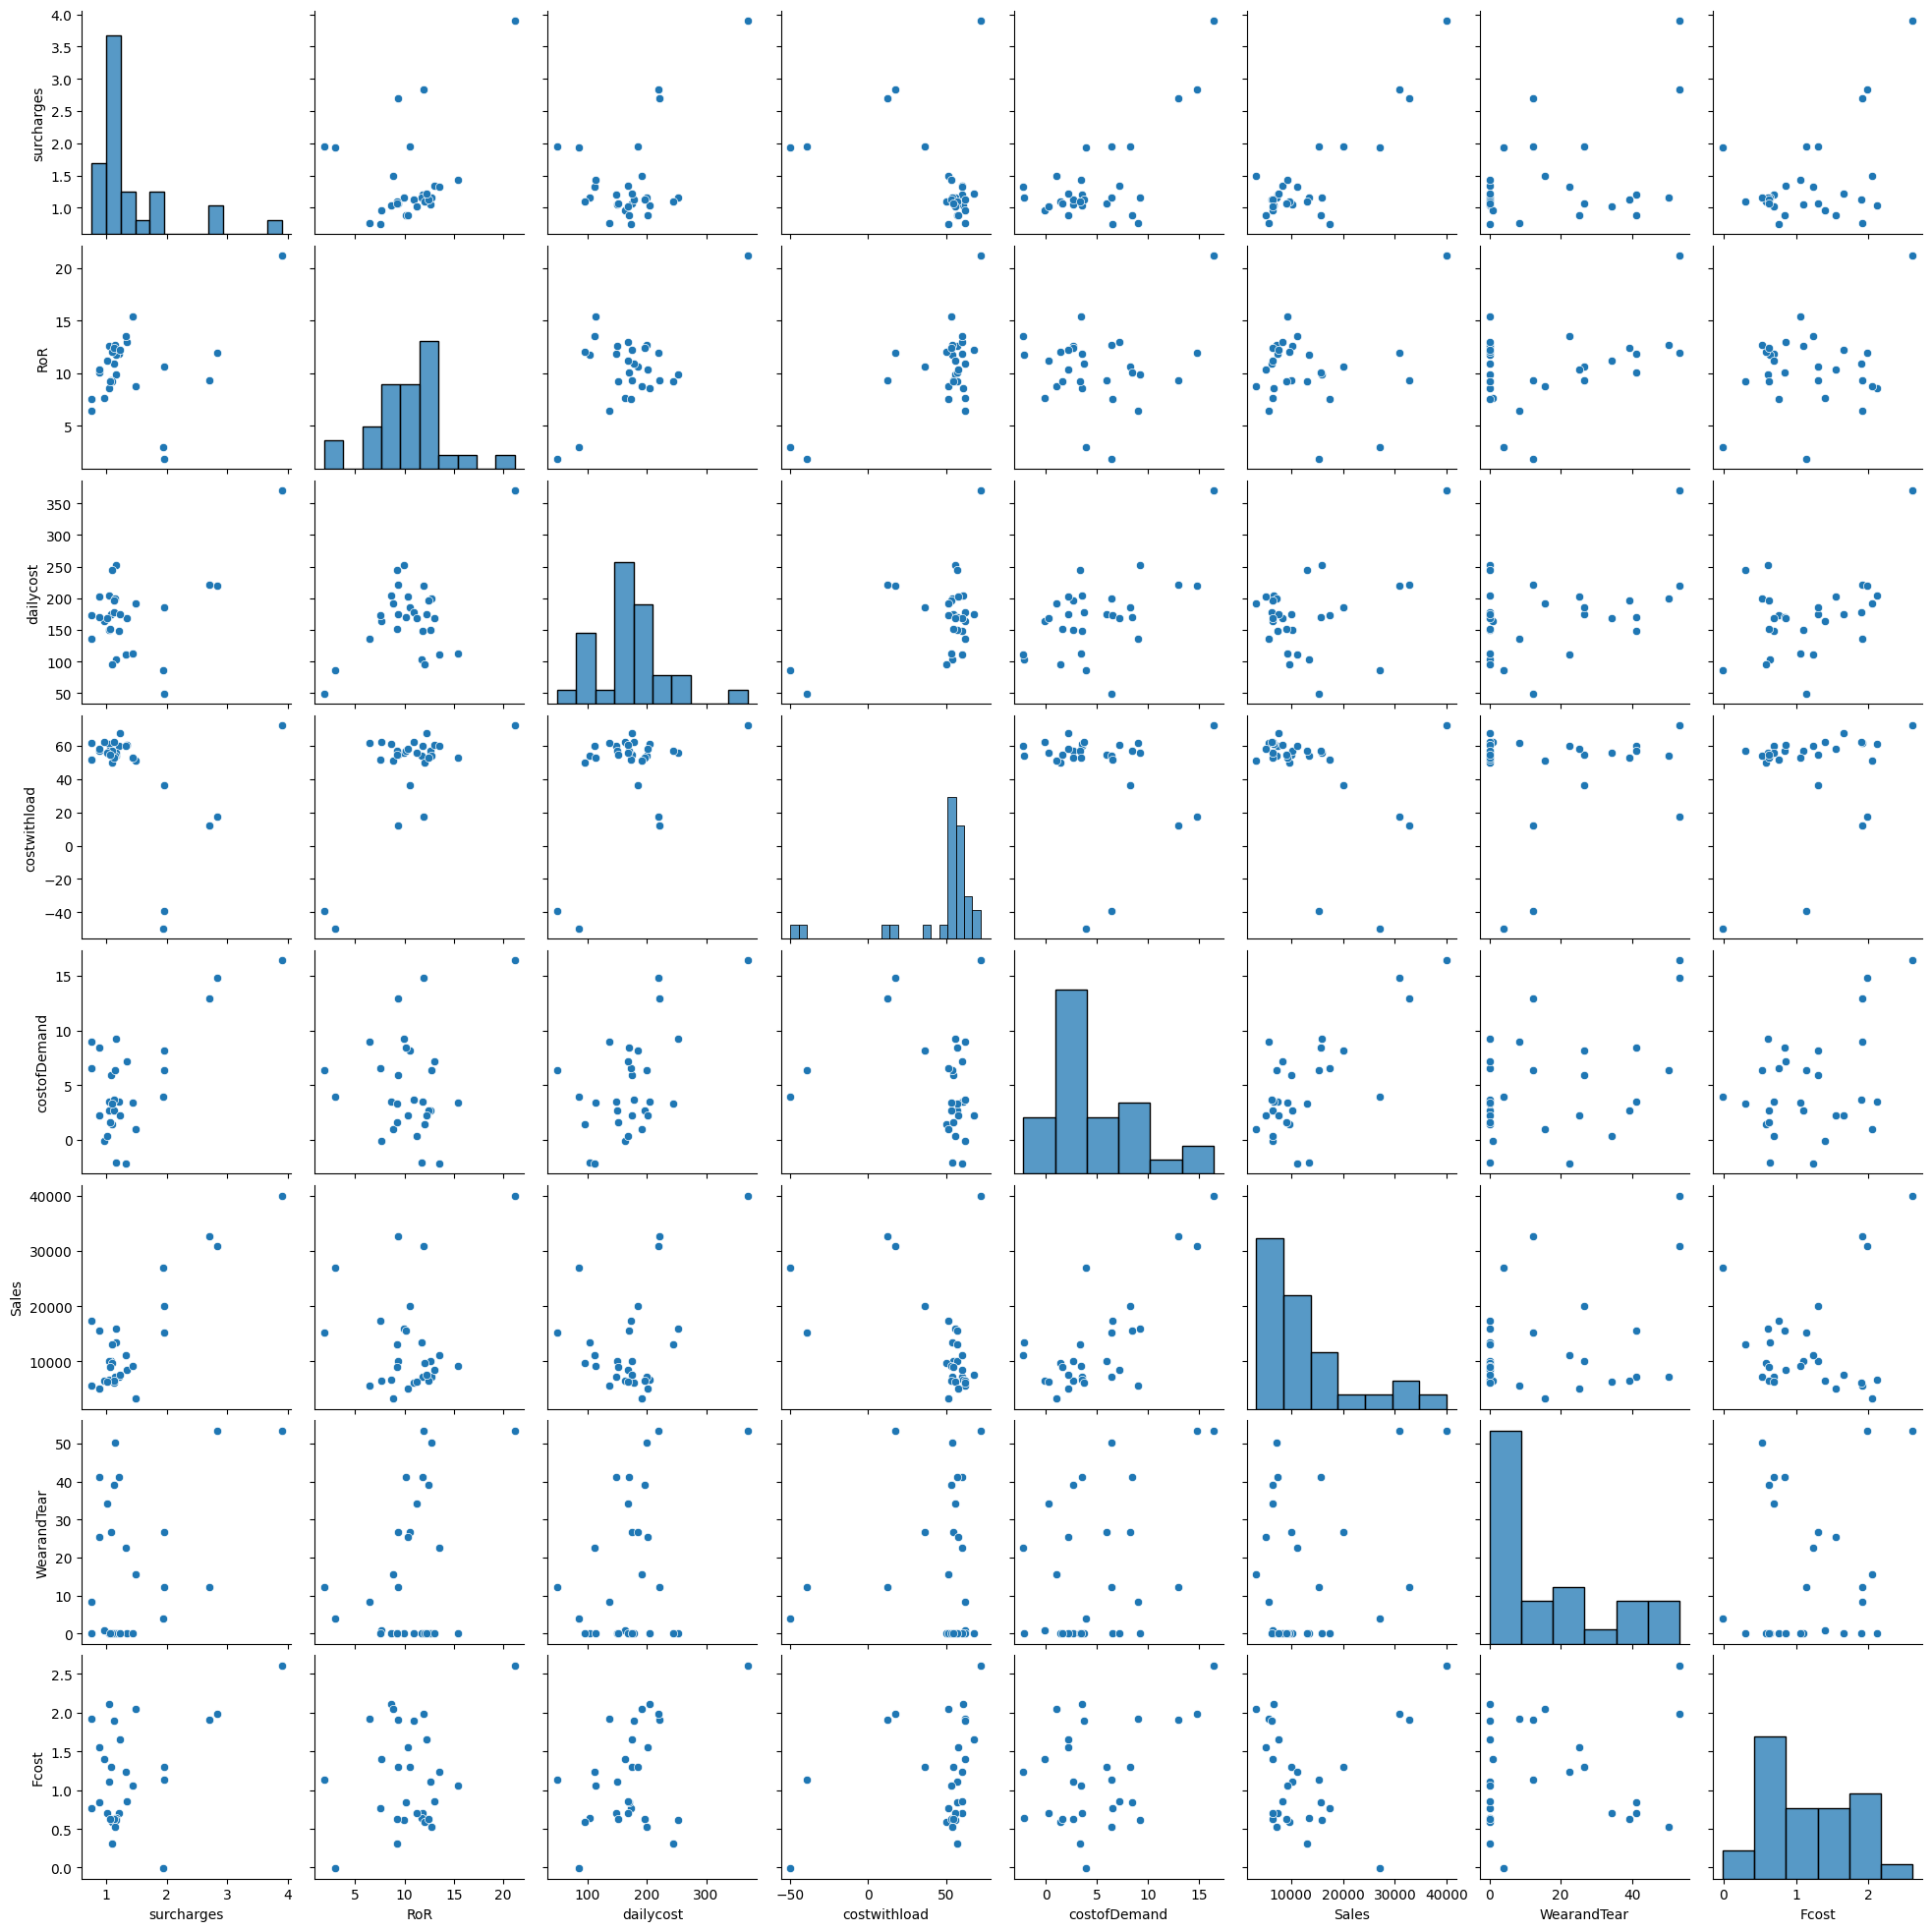

In [16]:
X = financials.iloc[:, 1:9]
sns.pairplot(X)

Text(0, 0.5, 'WCSS')

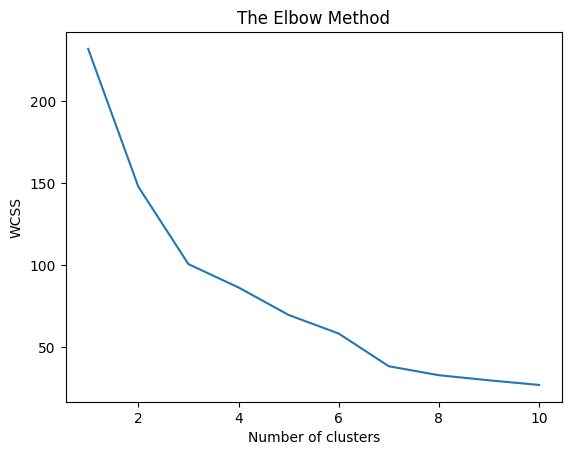

In [36]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

wcss = []
start_index = 1
stop_index = 11
for i in range (start_index, stop_index):
    kmeans = KMeans(n_init='auto', n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(start_index, stop_index), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [29]:
kmeans = KMeans(n_init='auto', n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 2], dtype=int32)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

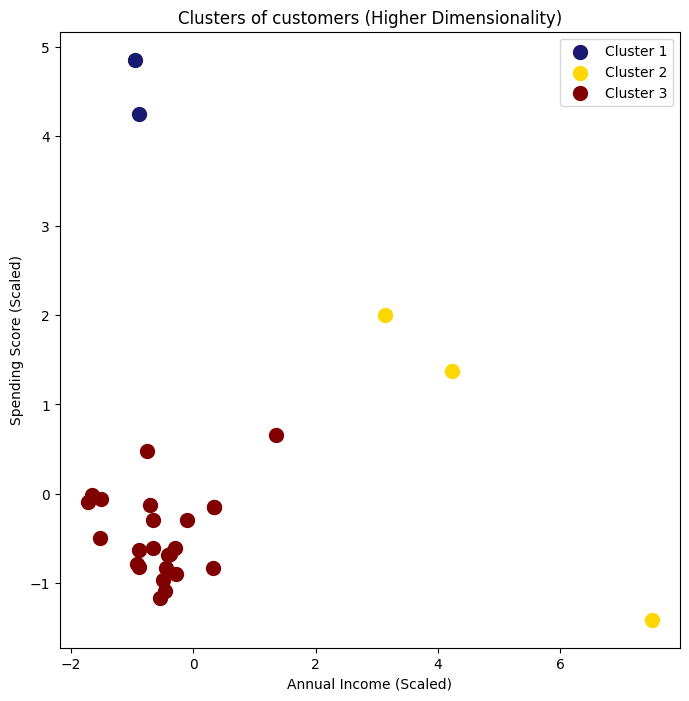

In [37]:
colors = ['midnightblue', 'gold', 'maroon']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans==i, 0], X_reduced[y_kmeans==i,1], s=100, c=colors[i], label=f'Cluster {i+1}')

plt.title('Clusters of customers (Higher Dimensionality)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

In [ ]:
NHpsrPu!aWBV8tb